In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:

train_DS=pd.read_csv('/content/Titanic-Dataset.csv')
train_DS.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:

train_DS.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:

train_DS.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:

train_DS.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

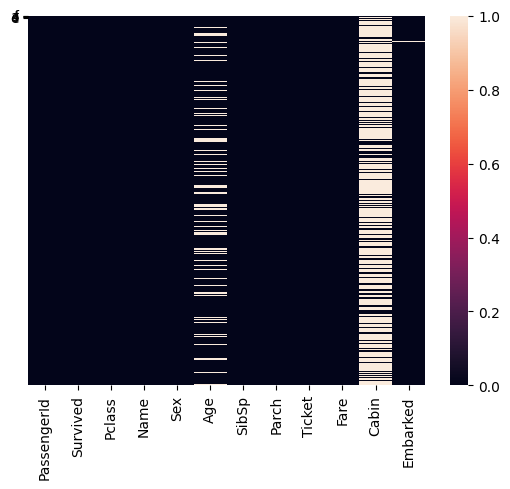

In [7]:
sns.heatmap(train_DS.isnull(),yticklabels="false")

<ipython-input-8-1fa4749801c0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap( train_DS.corr() , cmap='YlGnBu')


<Axes: >

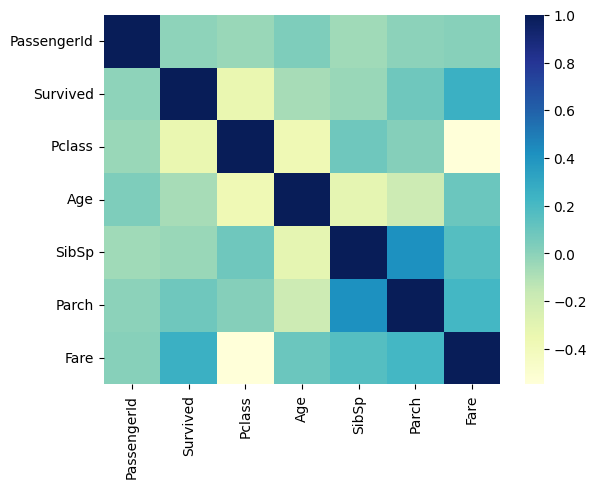

In [8]:

#Finding the Correlation of Survived with other features
#In seaborn
sns.heatmap( train_DS.corr() , cmap='YlGnBu')

In [9]:
train_DS.corr()

<ipython-input-9-fa9b8aca5301>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_DS.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:

#Observation
#age and pclass are having strong relation as the values are closer to -1 or +1
train_DS.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_DS.drop('Name', axis=1, inplace=True)


In [12]:
train_DS.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
train_DS.drop('Ticket',axis=1,inplace=True)

In [14]:
train_DS.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
train_DS.drop('PassengerId',axis=1,inplace=True)

In [16]:
train_DS['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

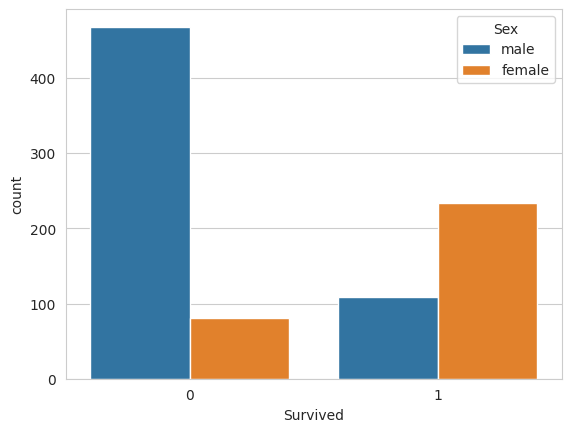

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train_DS)

In [18]:
#Lets Convert Categorical Data to numerical
#Sex can be converted as Male as 1 and Female as 0 by using map
train_DS['Sex']=train_DS['Sex'].map({'male':1,'female':0})


In [19]:
train_DS.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,NaN,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,NaN,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,NaN,S


In [20]:
train_DS['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
train_DS['Embarked']=train_DS['Embarked'].map({'S':0,'C':1,'Q':2})

In [22]:
train_DS['Sex'].astype(int)




0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [26]:
train_DS.drop('Embarked',axis=1,inplace=True)

In [27]:

train_DS.dtypes


Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
dtype: object

<Axes: xlabel='Age', ylabel='count'>

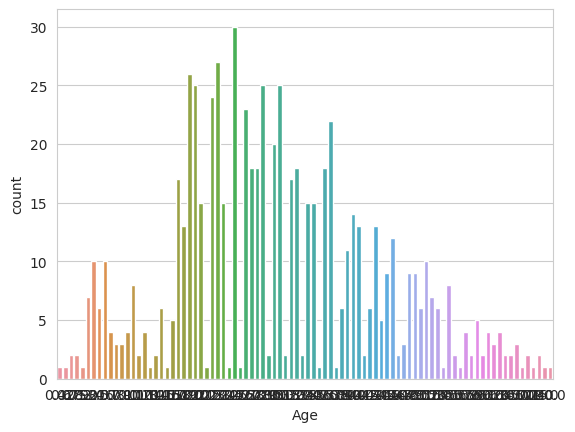

In [28]:
sns.countplot(data=train_DS,x='Age')

<Axes: xlabel='Pclass', ylabel='Age'>

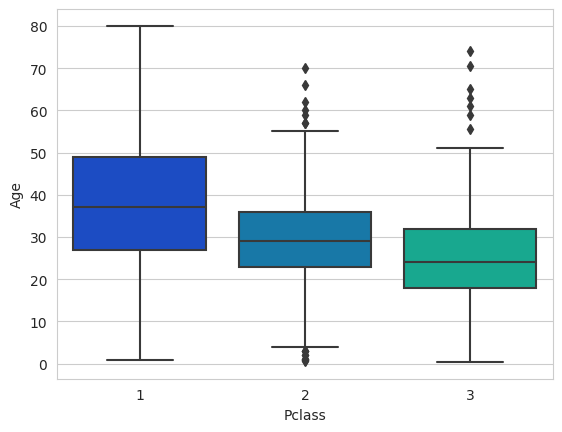

In [29]:
sns.boxplot(x='Pclass', y='Age', data=train_DS, palette='winter')

In [31]:

def upd_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 42
        elif Pclass==2:
            return 26
        else:
            return 23
    else:
        return Age


In [32]:
train_DS['Age']=train_DS[['Age','Pclass']].apply(upd_age,axis=1)

In [33]:
train_DS.drop('Cabin',axis=1,inplace=True)

In [34]:
train_DS.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [35]:

train_DS.isnull()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False


In [36]:
train_DS.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [37]:

#fare value is missing so ,update its mean value for fare
train_DS['Fare']=train_DS['Fare'].fillna(train_DS['Fare'].mean())

In [38]:
train_DS.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [39]:
train_DS.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [40]:
train_DS['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [41]:
#spliting the data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
X= train_DS.drop(['Survived'], axis=1)
#y= train_DS.iloc[:,1]
y=train_DS['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=101)

In [42]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [44]:

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [45]:

lr = LogisticRegression()
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()

lr.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

lr_pred = lr.predict(X_test_scaled)
rf_pred = rf.predict(X_test_scaled)
dt_pred = dt.predict(X_test_scaled)

In [46]:
lr_report = classification_report(y_test, lr_pred)
lr_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

rf_report = classification_report(y_test, rf_pred)
rf_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

dt_report = classification_report(y_test, dt_pred)
dt_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='accuracy')


print('The classification report of Logistic Regression is below : ', '\n\n\n', lr_report)
print(f"Logistic Regression Mean Cross-Validation Score: {lr_scores}")
print('\n\n')
print('The classification report of Random Forest is below : ', '\n\n\n', rf_report)
print(f"Random Forest Mean Cross-Validation Score: {rf_scores}")

print('\n\n')
print('The classification report of Decision Tree Classifier is below : ', '\n\n\n', dt_report)
print(f"Decision Tree Classifier Mean Cross-Validation Score: {dt_scores}")

The classification report of Logistic Regression is below :  


               precision    recall  f1-score   support

           0       0.78      0.86      0.81       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268

Logistic Regression Mean Cross-Validation Score: [0.832      0.816      0.76       0.87903226 0.7983871 ]



The classification report of Random Forest is below :  


               precision    recall  f1-score   support

           0       0.82      0.87      0.85       154
           1       0.81      0.75      0.78       114

    accuracy                           0.82       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

Random Forest Mean Cross-Validation Score: [0.832      0.84       0.76       0.79032258 0.7983871 ]



The classi

In [47]:

from sklearn.metrics import accuracy_score

In [48]:
accuracy=accuracy_score(y_test,lr_pred)
accuracy

0.7761194029850746